In [2]:
from datasets import load_from_disk

# Specify the path to the dataset
dataset_path = '/home/sjoshi/lmm/lmm_synthetic/data/generated/v3_spatial_grid_multimodal'

# Load the dataset
dataset = load_from_disk(dataset_path)

# Display the dataset
print(dataset)

/home/sjoshi/miniconda3/envs/vlm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
})


In [3]:
dataset["train"][0]

{'text': "| deer | cat | bird |\n| deer | cat | cat |\n| bird | dog | bird |\nThe grid above is size 3 by 3. Each cell contains an object from ['deer', 'bird', 'dog', 'cat'].\nWhat object is in row 2, column 2? A: bird\nWhat object is in row 1, column 2? A: cat\nWhat object is in row 0, column 0? A: deer\nWhat object is in row 0, column 1? A: cat\nWhat object is in row 1, column 0? A: deer\nWhat object is in row 1, column 1? A: cat\nWhat object is in row 0, column 2? A: bird\nWhat object is in row 2, column 1? A: dog\nWhat object is in row 2, column 0? A: bird",
 'prompt': "The grid above is size 3 by 3. Each cell contains an object from ['deer', 'bird', 'dog', 'cat'].",
 'conversations': [['What object is in row 2, column 2?', 'A: bird'],
  ['What object is in row 1, column 2?', 'A: cat'],
  ['What object is in row 0, column 0?', 'A: deer'],
  ['What object is in row 0, column 1?', 'A: cat'],
  ['What object is in row 1, column 0?', 'A: deer'],
  ['What object is in row 1, column 1?',

In [4]:
from datasets import DatasetDict

# Update paths in the dataset and save to disk
def update_image_paths(dataset, old_path, new_path, save_path):
    """
    Updates all "image" paths in the dataset by replacing old_path with new_path.
    
    Args:
        dataset: A DatasetDict containing splits like "train", "validation", "test".
        old_path: The substring in the current paths to be replaced.
        new_path: The new substring to replace old_path.
        save_path: Path to save the updated dataset.
    """
    # Loop through all splits in the dataset
    for split in dataset.keys():
        # Map the "image" column to replace the old_path with the new_path
        dataset[split] = dataset[split].map(
            lambda example: {"image": example["image"].replace(old_path, new_path)}
        )
    
    # Save the updated dataset to disk
    dataset.save_to_disk(save_path)

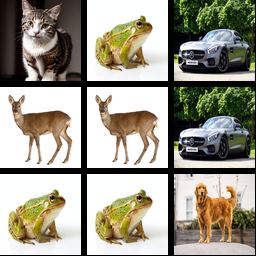

The grid above is size 3 by 3. Each cell contains an object from ['automobile', 'deer', 'dog', 'cat', 'frog'].
What object is in row 1, column 1?
A: deer
What object is in row 0, column 2?
A: automobile
What object is in row 2, column 1?
A: frog
What object is in row 2, column 2?
A: dog
What object is in row 0, column 1?
A: frog
What object is in row 0, column 0?
A: cat
What object is in row 1, column 0?
A: deer
What object is in row 1, column 2?
A: automobile
What object is in row 2, column 0?
A: frog


In [5]:
import random 
from PIL import Image 

randint = random.randint(0, 1000)
display(Image.open(dataset['train'][randint]["image"]))
print(dataset['train'][randint]["prompt"])
for conv in dataset["train"][randint]["conversations"]:
    print(conv[0])
    print(conv[1])

In [ ]:
import random 
from PIL import Image 

randint = random.randint(0, 1000)
dataset['train'][randint]["image"]
print(dataset['train'][randint]["prompt"])
for conv in dataset["train"][randint]["conversations"]:
    print(conv[0])
    print(conv[1])

In [3]:
from PIL import Image 

img = Image.open("/home/sjoshi/lmm/example.png")
print(img.size)

(256, 256)


In [4]:
from lmm_synthetic.mm_train.utils import load_vision_encoder

_, image_transforms, _ = load_vision_encoder("clip")

/home/sjoshi/miniconda3/envs/vlm/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/sjoshi/miniconda3/envs/vlm/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [5]:
print(image_transforms)

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711])
)


In [6]:
from torchvision import transforms as T 

resize = T.Resize((224, 224))
img_resized = resize(img)
print(img_resized.size)

(224, 224)


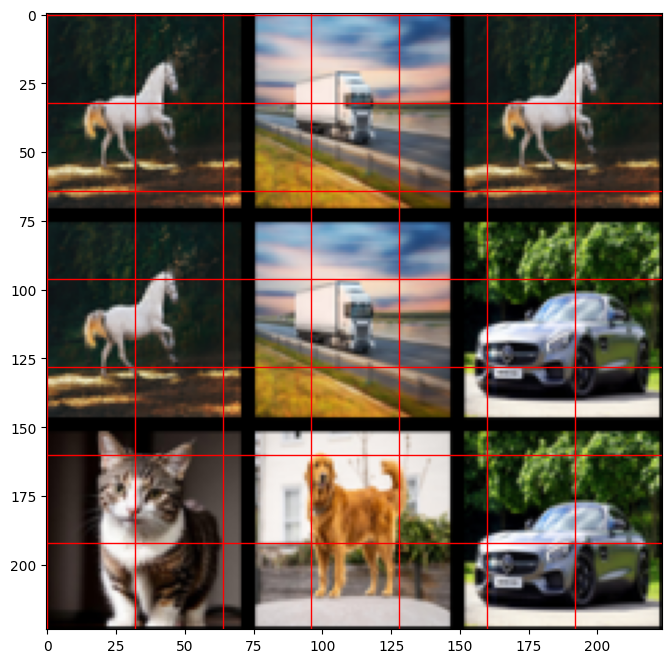

In [7]:
import numpy as np

import matplotlib.pyplot as plt

# Convert the image to a numpy array
img_array = np.array(img_resized)

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Display the image
ax.imshow(img_array)

# Draw red lines for 32x32 patches
patch_size = 32
for i in range(0, img_resized.size[0], patch_size):
    ax.axhline(i, color='red', linewidth=1)
    ax.axvline(i, color='red', linewidth=1)

# Show the plot
plt.show()